# Web Content Extraction using Machine Learning

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import heapq
from collections import Counter
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def lcs(X, Y):
    # find the length of the strings
    m = len(X)
    n = len(Y)
  
    # declaring the array for storing the dp values
    L = [[None]*(n + 1) for i in range(m + 1)]
  
    """Following steps build L[m + 1][n + 1] in bottom up fashion
    Note: L[i][j] contains length of LCS of X[0..i-1]
    and Y[0..j-1]"""
    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0 or j == 0 :
                L[i][j] = 0
            elif X[i-1] == Y[j-1]:
                L[i][j] = L[i-1][j-1]+1
            else:
                L[i][j] = max(L[i-1][j], L[i][j-1])
  
    # L[m][n] contains the length of LCS of X[0..n-1] & Y[0..m-1]
    return L[m][n]

## Data Retrieval

In [3]:
URL ="https://timesofindia.indiatimes.com/city/bengaluru/3-techies-develop-non-contact-baby-monitor-to-track-sleep-breathing/articleshow/57153897.cms"
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html5lib')
print(page.content[0:1000])

b'<!doctype html><html class="no-js" lang="en"><head><meta charSet="utf-8"/><meta http-equiv="x-ua-compatible" content="ie=edge"/><meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1.0, user-scalable=no"/><title>3 techies develop non-contact baby monitor to track sleep, breathing | Bengaluru News - Times of India</title><meta name="description" content="Prachi (name changed), 32, a corporate professional and single mother, is sleep-deprived. So is her five-month-old son, who wakes up in the middle of "/><meta name="keywords" content="Bengaluru news, Bengaluru latest news, Bengaluru news live, Bengaluru news today, Today news Bengaluru,sanchi poovaya coo kickstarter,ranjana nair sanchi poovaya,Baby Tracker,Sleep Deprivation,Non-Contact Baby Tracker"/><link rel="canonical" href="https://timesofindia.indiatimes.com/city/bengaluru/3-techies-develop-non-contact-baby-monitor-to-track-sleep-breathing/articleshow/57153897.cms"/><link rel="alternate" href="https:/

In [4]:
meta = []
for tag in soup.findAll(True):
    if tag.name == "meta":
        meta.append(tag.attrs)

## Extracting the Meta Content

In [5]:
metaContent = []
for dic in meta:
    if dic.get("content") is not None:
        metaContent.append(dic["content"])

### Removing Noises in the Meta Content

In [6]:
noise = ["https", ".com", "com.", "www", "@", ":", "=", "#"]
metaContentFinal = []
for content in metaContent:
    if any(i in content for i in noise):
        pass
    else:
        metaContentFinal.append(content)

metaContentStr = ""

for content in metaContentFinal:
    metaContentStr = metaContentStr + content

In [7]:
print(metaContentStr)

Prachi (name changed), 32, a corporate professional and single mother, is sleep-deprived. So is her five-month-old son, who wakes up in the middle of Bengaluru news, Bengaluru latest news, Bengaluru news live, Bengaluru news today, Today news Bengaluru,sanchi poovaya coo kickstarter,ranjana nair sanchi poovaya,Baby Tracker,Sleep Deprivation,Non-Contact Baby Tracker3 techies develop non-contact baby monitor to track sleep, breathing | Bengaluru News - Times of IndiaPrachi (name changed), 32, a corporate professional and single mother, is sleep-deprived. So is her five-month-old son, who wakes up in the middle of 3 techies develop non-contact baby monitor to track sleep, breathing | Bengaluru News - Times of IndiaPrachi (name changed), 32, a corporate professional and single mother, is sleep-deprived. So is her five-month-old son, who wakes up in the middle of 1070580yessanchi poovaya coo kickstarter,ranjana nair sanchi poovaya,Baby Tracker,Sleep Deprivation,Non-Contact Baby Trackerb1abb

## Feature Extraction

### Tags, Texts, Attributes Extraction

In [8]:
tags = []
texts = []
attrs = []

for tag in soup.findAll(True):
    if (tag.name == "style") or (tag.name == "script") or (tag.name == "body") or (tag.name == "div") or (tag.name == "html") or (tag.name == "head"):
        continue
    else:
        tags.append(tag.name)
        texts.append(tag.text)
        attrs.append(tag.attrs)

In [9]:
tags[0:10]

['meta',
 'meta',
 'meta',
 'title',
 'meta',
 'meta',
 'link',
 'link',
 'link',
 'meta']

In [10]:
tagsCount = Counter(tags)
uniqueTags = list(tagsCount.keys())
countValues = list(tagsCount.values())

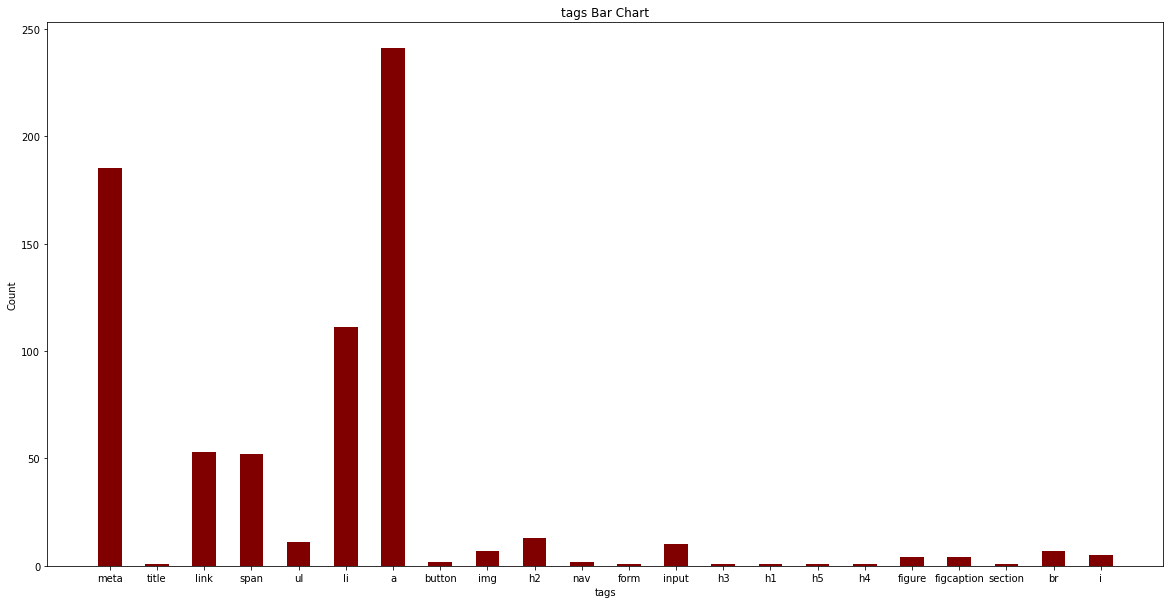

In [11]:
fig = plt.figure(figsize = (20, 10))
plt.bar(uniqueTags, countValues, color ='maroon',width = 0.5)
plt.xlabel("tags")
plt.ylabel("Count")
plt.title("tags Bar Chart")
plt.show()

In [12]:
texts[0:5]

['',
 '',
 '',
 '3 techies develop non-contact baby monitor to track sleep, breathing | Bengaluru News - Times of India',
 '']

In [13]:
attrs[0:5]

[{'charset': 'utf-8'},
 {'http-equiv': 'x-ua-compatible', 'content': 'ie=edge'},
 {'name': 'viewport',
  'content': 'width=device-width, initial-scale=1, maximum-scale=1.0, user-scalable=no'},
 {},
 {'name': 'description',
  'content': 'Prachi (name changed), 32, a corporate professional and single mother, is sleep-deprived. So is her five-month-old son, who wakes up in the middle of '}]

### Feature selection

In [14]:
texts = pd.Series(texts)
column = list(set(tags))

data = []

for i in range(0, len(tags)):
    data1 = []
    for j in range(0, len(column)):
        if tags[i] == column[j]:
            data1.append(1)
        else:
            data1.append(0)
    data.append(data1)

df = pd.DataFrame(columns=column, data=data)

In [15]:
df.head()

,img,ul,button,section,h4,meta,a,h2,h5,li,...,br,figcaption,title,span,h1,form,link,h3,figure,nav
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Text Length as Feature

In [16]:
textSize = []

for text in texts:
    textSize.append(len(text))

df["textSize"] = textSize

In [17]:
df.head()

,img,ul,button,section,h4,meta,a,h2,h5,li,...,figcaption,title,span,h1,form,link,h3,figure,nav,textSize
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,102
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### HTML Tags Attribute as Feature

In [18]:
attrsColumn = []
for i in attrs:
    attrsColumn.append(list(i.keys()))

attrsColumn = sum(attrsColumn, [])

attrsColumn = list(set(attrsColumn))

data = []
for i in attrs:
    idx = []
    for j in i.keys():
        for k in range(0, len(attrsColumn)):
            if j == attrsColumn[k]:
                idx.append(k)

    data.append([1 if i in idx else 0 for i in range(0, len(attrsColumn))])

df1 = pd.DataFrame(columns=attrsColumn, data=data)

finalDf1 = pd.concat([df, df1], axis=1, join='inner')

In [19]:
finalDf1.head()

,img,ul,button,section,h4,meta,a,h2,h5,li,...,itemprop,id,autocomplete,data-scrollga,frmappuse,name,decoding,value,data-plugin,data-tpwidget
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### JavaScript Keywords as Feature

In [20]:
keywords = ["await", "break", "case", "catch", "class", "const", "continue", "debugger",
            "default", "delete", "do", "else", "enum", "export", "extends", "false",
            "finally", "for", "function", "if", "implements", "import", "in", "instanceof", "interface",
            "let", "new", "null", "package", "private", "protected", "public", "return", "super", "switch",
            "static", "throw", "try", "true", "typeof", "var", "void", "while", "with", "yield",
            "(", ")", "{", "}", "]", "[", ";", ".", "\"", "function", "console", "cmd", "display", "push",
            "window", "href", "\'", "return"]


data=[]
for i in str(texts):
    data1=[]
    for j in keywords:
        c = i.count(j)
        data1.append(c)
    data.append(data1)


df1 = pd.DataFrame(columns=keywords, data=data)
finalDf2 = pd.concat([finalDf1, df1], axis=1, join='inner')

In [21]:
finalDf2.head()

,img,ul,button,section,h4,meta,a,h2,h5,li,...,"""",function,console,cmd,display,push,window,href,',return
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### HTML tags CSS Class as attribute

In [22]:
tagsClass = []

for attr in attrs:
    tagsClass.append(attr.get("class"))

classList = []
for i in tagsClass:
    if i:
        for j in i:
            classList.append(j)

uniqueClass = list(set(classList))

data = []
zeroes = [0 for i in range(len(uniqueClass))]
for iClass in tagsClass:
    row=[]
    if iClass:
        for j in uniqueClass:
            if j in iClass:
                row.append(1)
            else:
                row.append(0)
        data.append(row)
    else:
        data.append(zeroes)


df = pd.DataFrame(columns=uniqueClass,data=data)

finalDf3 = pd.concat([finalDf2, df], axis=1, join='inner')

In [23]:
finalDf3.head()

,img,ul,button,section,h4,meta,a,h2,h5,li,...,_3oGCI,clearfix,eu-hidden,GAn-R,_2SH3z,nav_links_wrapper,_3gMVf,logout-window,login,_1aBky
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Normalization

In [24]:
std = StandardScaler()

finalDf3 = std.fit_transform(finalDf3)

finalDf3 = pd.DataFrame(finalDf3)

In [25]:
finalDf3.head()

,0,1,2,3,4,5,6,7,8,9,...,174,175,176,177,178,179,180,181,182,183
0,-0.104096,-0.130897,-0.055427,-0.039163,-0.039163,1.590512,-0.623989,-0.124708,-0.039163,-0.452545,...,-0.039163,-0.039163,-0.055427,-0.055427,-0.039163,-0.055427,-0.130897,-0.039163,-0.039163,-0.039163
1,-0.104096,-0.130897,-0.055427,-0.039163,-0.039163,1.590512,-0.623989,-0.124708,-0.039163,-0.452545,...,-0.039163,-0.039163,-0.055427,-0.055427,-0.039163,-0.055427,-0.130897,-0.039163,-0.039163,-0.039163
2,-0.104096,-0.130897,-0.055427,-0.039163,-0.039163,1.590512,-0.623989,-0.124708,-0.039163,-0.452545,...,-0.039163,-0.039163,-0.055427,-0.055427,-0.039163,-0.055427,-0.130897,-0.039163,-0.039163,-0.039163
3,-0.104096,-0.130897,-0.055427,-0.039163,-0.039163,-0.628728,-0.623989,-0.124708,-0.039163,-0.452545,...,-0.039163,-0.039163,-0.055427,-0.055427,-0.039163,-0.055427,-0.130897,-0.039163,-0.039163,-0.039163
4,-0.104096,-0.130897,-0.055427,-0.039163,-0.039163,1.590512,-0.623989,-0.124708,-0.039163,-0.452545,...,-0.039163,-0.039163,-0.055427,-0.055427,-0.039163,-0.055427,-0.130897,-0.039163,-0.039163,-0.039163


## DBSCAN Clustering

In [26]:
clustering = DBSCAN().fit(finalDf3)

uniqueClusters = set(clustering.labels_)

finalDf3["cluster"] =[i+1 for i in clustering.labels_]

print(finalDf3.head())

          0         1         2         3         4         5         6  \
0 -0.104096 -0.130897 -0.055427 -0.039163 -0.039163  1.590512 -0.623989   
1 -0.104096 -0.130897 -0.055427 -0.039163 -0.039163  1.590512 -0.623989   
2 -0.104096 -0.130897 -0.055427 -0.039163 -0.039163  1.590512 -0.623989   
3 -0.104096 -0.130897 -0.055427 -0.039163 -0.039163 -0.628728 -0.623989   
4 -0.104096 -0.130897 -0.055427 -0.039163 -0.039163  1.590512 -0.623989   

          7         8         9  ...       175       176       177       178  \
0 -0.124708 -0.039163 -0.452545  ... -0.039163 -0.055427 -0.055427 -0.039163   
1 -0.124708 -0.039163 -0.452545  ... -0.039163 -0.055427 -0.055427 -0.039163   
2 -0.124708 -0.039163 -0.452545  ... -0.039163 -0.055427 -0.055427 -0.039163   
3 -0.124708 -0.039163 -0.452545  ... -0.039163 -0.055427 -0.055427 -0.039163   
4 -0.124708 -0.039163 -0.452545  ... -0.039163 -0.055427 -0.055427 -0.039163   

        179       180       181       182       183  cluster  
0 -0.

## Relavance Score for Each Cluster

In [27]:
score = [0 for i in range(len(uniqueClusters))]

for i in range(0, finalDf3.shape[0]):
    score[int(finalDf3.loc[i]["cluster"])] = score[int(finalDf3.loc[i]["cluster"])] + lcs(metaContentStr,texts[i])

### Cluster with Highest Score

In [28]:
print("Score of Each Cluster")
print(score)

print()
print("Clusters with high Score")

maxScoreClusters = heapq.nlargest(2, range(len(score)), key=score.__getitem__)
print(maxScoreClusters)

Score of Each Cluster
[4237, 0, 0, 0, 0, 627, 67, 0, 515, 510, 0, 118, 112, 103, 0, 327, 327, 113, 293, 336, 78]

Clusters with high Score
[0, 5]


## Label Marking

In [29]:
label = []

for i in range(0,finalDf3.shape[0]):
    if (int(finalDf3.loc[i]["cluster"]) == maxScoreClusters[0]) or (int(finalDf3.loc[i]["cluster"]) == maxScoreClusters[1]):
        label.append(1)
    else:
        label.append(0)
finalDf3["label"] = label

In [30]:
finalDf3.head()

,0,1,2,3,4,5,6,7,8,9,...,176,177,178,179,180,181,182,183,cluster,label
0,-0.104096,-0.130897,-0.055427,-0.039163,-0.039163,1.590512,-0.623989,-0.124708,-0.039163,-0.452545,...,-0.055427,-0.055427,-0.039163,-0.055427,-0.130897,-0.039163,-0.039163,-0.039163,0,1
1,-0.104096,-0.130897,-0.055427,-0.039163,-0.039163,1.590512,-0.623989,-0.124708,-0.039163,-0.452545,...,-0.055427,-0.055427,-0.039163,-0.055427,-0.130897,-0.039163,-0.039163,-0.039163,0,1
2,-0.104096,-0.130897,-0.055427,-0.039163,-0.039163,1.590512,-0.623989,-0.124708,-0.039163,-0.452545,...,-0.055427,-0.055427,-0.039163,-0.055427,-0.130897,-0.039163,-0.039163,-0.039163,1,0
3,-0.104096,-0.130897,-0.055427,-0.039163,-0.039163,-0.628728,-0.623989,-0.124708,-0.039163,-0.452545,...,-0.055427,-0.055427,-0.039163,-0.055427,-0.130897,-0.039163,-0.039163,-0.039163,0,1
4,-0.104096,-0.130897,-0.055427,-0.039163,-0.039163,1.590512,-0.623989,-0.124708,-0.039163,-0.452545,...,-0.055427,-0.055427,-0.039163,-0.055427,-0.130897,-0.039163,-0.039163,-0.039163,1,0


## SVM Classification

### Data Pre-Processing

In [31]:
X_clusters = finalDf3["cluster"]
finalDf3 = finalDf3.drop(columns="cluster")

X = finalDf3.drop(columns="label")
y = finalDf3["label"]

In [32]:
print(X.shape)
print(y.shape)

(653, 184)
(653,)


### Train and Test Data Split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Training the Model

In [34]:
svmModel = SVC()
svmModel.fit(X_train,y_train)

SVC()

### Prediction

In [35]:
prediction = svmModel.predict(X_test)

### Performance

In [36]:
print("F1 Score of SVM Model")
f1Score = f1_score(y_test,prediction)
print(f1Score)

F1 Score of SVM Model
0.888888888888889


### Confusion Matrix

In [37]:
print("Confusion Matrix")
cf_matrix = confusion_matrix(y_test,prediction)
print(cf_matrix)

Confusion Matrix
[[171   4]
 [  5  36]]


<AxesSubplot:>

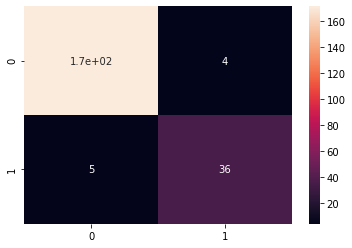

In [38]:
sns.heatmap(cf_matrix, annot=True)